In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dog-breed-identification -p /content/drive/MyDrive/Deep_Leaning/Dog-Vision --force


 99% 681M/691M [00:07<00:00, 84.9MB/s]
100% 691M/691M [00:07<00:00, 91.2MB/s]


In [ ]:
!unzip /data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/83fad0718581a696132c96c166472627.jpg  
  in

# 🐶 End-to-End Multi-class Dog Breed classfication

This notebook build an end-end multi-class image classfier using tenserflow 2.0 and Tenserflow Hub.

## 1. Problem
Identifying the breed of dog given an image of a dog.

When I'm sitting at the park i want to know what breed is that dog

## 2.Data

The data we're usign is from kaggle's dog breed identification competition

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evauation is file iwth prediction probablities for each dog breed of each test image

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

4. Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.

* There are 120 breeds of dogs (this means there are 120 different classes).

* There are around 10,000+ images in the training set (these images have labels).

* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

# Get our Workspace Ready

* import Tensorflow 2. 0 ✅

* import Tensorflow Hub ✅

* Make sure we're using ✅

In [2]:
# import tensorflow

import tensorflow as tf
import tensorflow_hub as hub

print("Tenserflow version",tf.__version__)
print("Tenserflow Hub version",hub.__version__)

# check GPU
print("GPU" ,"Available (Yes)" if tf.config.list_physical_devices("GPU") else "Not Available 😢")


Tenserflow version 2.12.0
Tenserflow Hub version 0.13.0
GPU Available (Yes)


## Loading data and labels

with all ml models, out data has to be in numerical format.

In [3]:
# checkout the labels of our data
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Deep_Leaning/Dog-Vision/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Find how may image are in each label
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

## Getting out data ready (turning into tensors)

with all machine learning models,out data has to be in numberical format. os that's what we'll be doing first.Turning our images into
Tensors (numerical representations)

In [4]:
# what the midian number of image per class

labels_csv["breed"].value_counts().median()

82.0

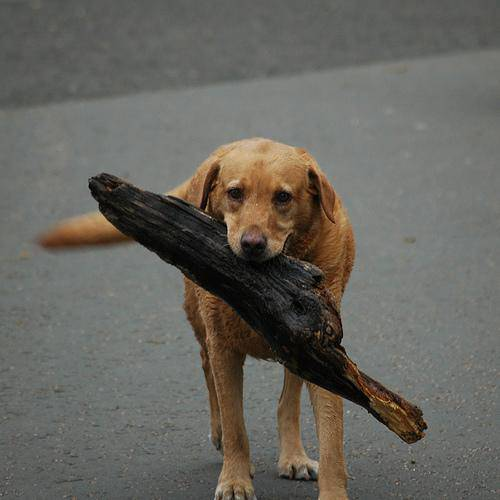

In [5]:
# visualize the image
from IPython.display import Image

Image("/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")


# Getting image and their labels ready



In [6]:
file_names=['/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/'+fname+'.jpg' for fname in labels_csv["id"]]
file_names

['/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train/00439

In [ ]:
len(file_names)

10222

In [7]:
# Check whether number of filenames match number of actual image files

import os
if len(os.listdir("/content/drive/MyDrive/Deep_Leaning/Dog-Vision/train"))==len(file_names):
  print("Filename match actual Amount of files!! ")
else:

  print("Filename not match actual Amount of files :( ")

Filename match actual Amount of files!! 


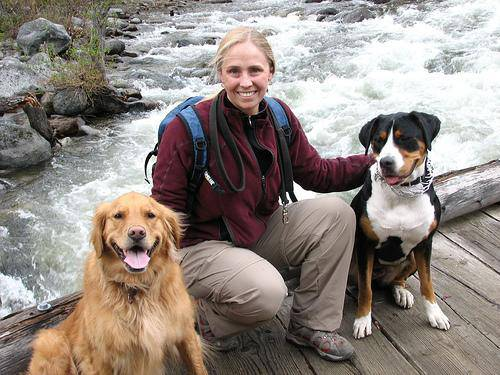

In [ ]:
Image(file_names[9994])

#  Turning labels to numbers

In [8]:
import numpy as np

labels=labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [9]:
# check for missing data
# to do that see if number of lables match the no of filename

if len(labels)==len(file_names):
  print("Number of labels matched with the files ")
else:
  print("Number of labels not matched with the files")


Number of labels matched with the files 


In [12]:
# find the Unique labels
unique_breed=np.unique(labels)
print("uniqu lables are ",len(unique_breed))

uniqu lables are  120


In [ ]:
# Turn a single label into an array of booleans

labels[0]==unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
# Turn Every label

boolean_labels=[label == unique_breed for label in labels ]
len(boolean_labels)

10222

## Create our own validation set 🏐


In [14]:
from sklearn.model_selection import train_test_split

# set up X and y
X=file_names
y=boolean_labels

# we going to start off experimenting with `1000` images and increase as needed


In [15]:
# set number of images to use for experimenting

NUM_IMAGES=1000 #@param {types:"sliders",min:1000,max:10000}

In [16]:
# split into training and validation set

x_train,x_test,y_train,y_test=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

len(x_train),len(x_test),len(y_train),len(y_test)


(800, 200, 800, 200)

# Preprocessing images (turning images into tensors)

To preprocess our iages into Tensors we're going to write a function which does a few things:
1. TGake an images file path as input

2. use Tensorflow  to read the file and save it to a variable, `image`

3. Turn our `image` (a jpg) into Tensors

4. Resize the `iamges` to (224,224)

5. Return the modified `image`

# Before that lets see now its works

In [17]:
# conver image to numpy
from matplotlib.pyplot import imread

image=imread(file_names[34])
image.shape

(407, 594, 3)

In [18]:
# turn image into Tensors
tf.constant(image)

<tf.Tensor: shape=(407, 594, 3), dtype=uint8, numpy=
array([[[ 25,  26,  31],
        [ 24,  25,  30],
        [ 35,  36,  41],
        ...,
        [207, 200, 184],
        [205, 197, 184],
        [205, 197, 184]],

       [[ 41,  42,  47],
        [ 26,  27,  32],
        [ 38,  39,  44],
        ...,
        [207, 200, 184],
        [205, 197, 184],
        [205, 197, 184]],

       [[ 31,  32,  37],
        [ 21,  22,  27],
        [ 33,  34,  39],
        ...,
        [207, 200, 184],
        [206, 198, 185],
        [206, 198, 185]],

       ...,

       [[ 44,  45,  50],
        [ 52,  53,  58],
        [ 55,  56,  61],
        ...,
        [  5,   9,  21],
        [  9,  12,  21],
        [  9,  12,  21]],

       [[ 34,  35,  40],
        [ 42,  43,  48],
        [ 48,  49,  54],
        ...,
        [  7,  11,  23],
        [  9,  12,  21],
        [  9,  12,  21]],

       [[ 24,  25,  30],
        [ 28,  29,  34],
        [ 34,  35,  40],
        ...,
        [ 10,  14,  2

In [19]:
# define image size
size=224

# create a fucntion
def process_image(image_path,img_size=size):
  """
  Takes an image file path and turns the image into a tensor
  """

  # Read in a image file
  image=tf.io.read_file(image_path)

  # Turn jpeg image into numerical tensor with 3 colours channels (Red,blue,Green)
  image=tf.image.decode_jpeg(image,channels=3) # decodes the image to numbers

  # Normalize the value from 0-255 to 0-1
  image=tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image
  image=tf.image.resize(image,size=[img_size,img_size])

  return image

## Turning our data inot batches

why turn our data into batches 🤔 ?

let's say you're trying to process 10000+ iamges in one go they all might not fit into the memory.

so that's why we do about 32 (this is the batch size) images at a time (you can adjust he batch size )

in order to use TensorFlow effectively, we need our data into form of tensor tuples which  look like `(image,label)`



In [ ]:
# create a function to return a tuple(image,label)

def get_image_label(image_path,label):

    """
    Take an image efile path name and the associated label
    process the image with the `process image function`
    """
    image=process_image(image_path)
    return image,label

Now we've got a way to turn the iage into tuples of Tensors

let's make a function to turn all of our data into batches !